<p style="text-align:center">
    <a href="https://nbviewer.jupyter.org/github/twMr7/Python-Machine-Learning/blob/master/20-CNN_Fundamental.ipynb">
        Open In Jupyter nbviewer
        <img style="float: center;" src="https://nbviewer.jupyter.org/static/img/nav_logo.svg" width="120" />
    </a>
</p>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/twMr7/Python-Machine-Learning/blob/master/20-CNN_Fundamental.ipynb)

# 20. CNN Fundamental

Convolutional Neural Network (CNN) 與一般 DNN 的主要差異，在於使用了數學上稱為 convolution（捲積、旋積、或褶積）的操作，在影像處理及數位訊號處理的領域常用於空間濾波（spatial filtering）及頻域濾波（frequency domain filtering）。

+ [**20.1 簡介影像空間濾波**](#spatial-filter-intro)
+ [**20.2 基本影像處理概念**](#dip-filter-intro)
+ [**20.3 CNN 簡介**](#cnn-intro)
+ [**20.4 CNN 範例 - 建構 LeNet5 用於手寫數字辨識**](#lenet5-mnist)
+ [**20.5 CNN 範例 - 貓狗辨識**](#dogs-cats)
+ [**參考資料**](#references)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

<a id="spatial-filter-intro"></a>

## 20.1 簡介影像空間濾波

線性空間濾波有兩個非常類似的操作，一個是 ***correlation***（cross-correlation），一個是 ***convolution***。兩種操作都是使用濾波器（或稱 mask、kernel、weights kernel）逐次尋訪過每一個影像的像素做內積，差別在 convolution 要先將濾波器旋轉，以下分別展示一維的兩種操作範例。

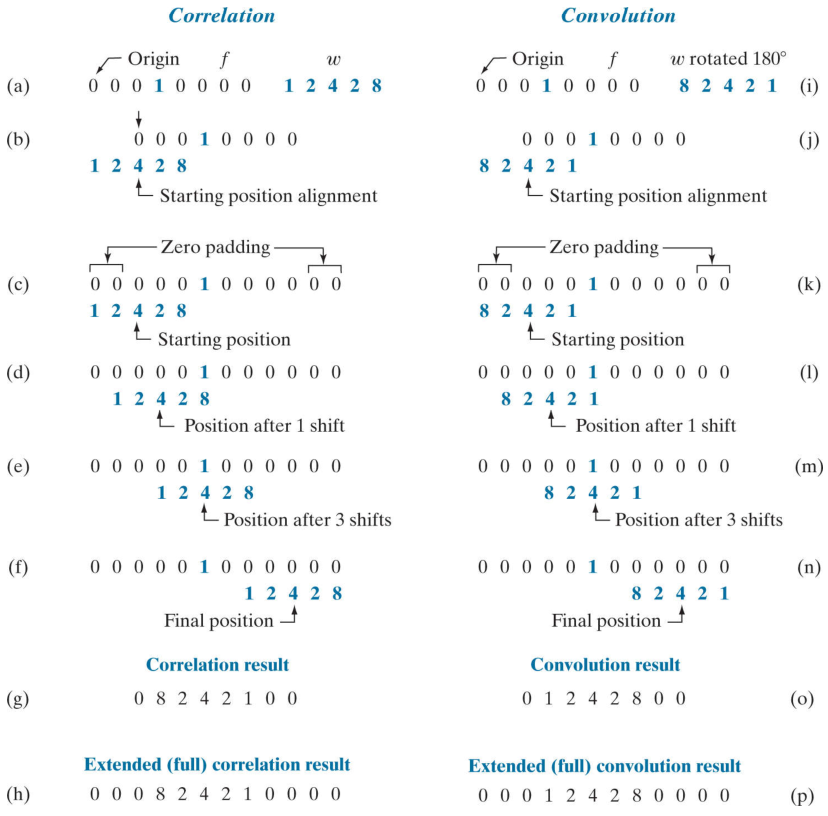


`Scipy` 套件有提供多維度影像處理的 [`ndimage`](https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html) 模組，影像資料是儲存成 numpy.ndarray 來處理的，模組中就包含了基本通用的濾波處理操作 [`convolve()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html) 與 [`correlate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.correlate.html)。 以下範例使用一維的脈衝訊號 $f$ 及濾波器遮罩 $w$，分別計算 correlation $f \star w$ 與 convolution $f \ast w$。

In [2]:
import numpy as np
from scipy.ndimage.filters import correlate, convolve

In [3]:
f = np.array([0, 0, 0, 1, 0, 0, 0, 0])
print('單位脈衝 f =', f)

w = np.array([1, 2, 4, 2, 8])
print('濾波器 w =', w)

單位脈衝 f = [0 0 0 1 0 0 0 0]
濾波器 w = [1 2 4 2 8]


In [4]:
# 執行 scipy.ndimage 的 correlation 操作
# cross-correlation 的運算符號是 ⋆ 
fwcorr = correlate(f, w, mode='constant', cval=0)
print('f ⋆ w =', fwcorr)

f ⋆ w = [0 8 2 4 2 1 0 0]


In [5]:
# 執行 scipy.ndimage 的 convolution 操作
# convolution 的運算符號是 ∗
fwconv = convolve(f, w, mode='constant', cval=0)
print('f ∗ w =', fwconv)

f ∗ w = [0 1 2 4 2 8 0 0]


雖然 convolution 多了將濾波器旋轉的步驟，若是在濾波器是對稱的情形下，那 convolution 與 correlation 的結果是一樣的。請試著將上面範例中的濾波器遮罩改成對稱，再執行一次看看。

一維的操作很容易延伸到二維的影像處理上，濾波器遮罩 $w(x, y)$ 套用 convolution 操作到脈衝訊號 $f(x, y)$ 之前要先旋轉 180°（上下翻轉＋左右翻轉）。

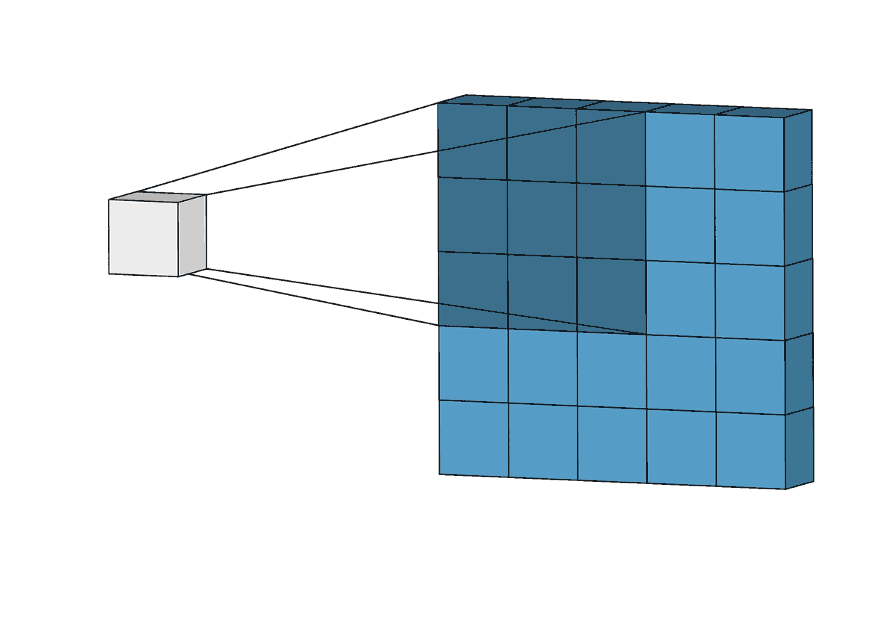

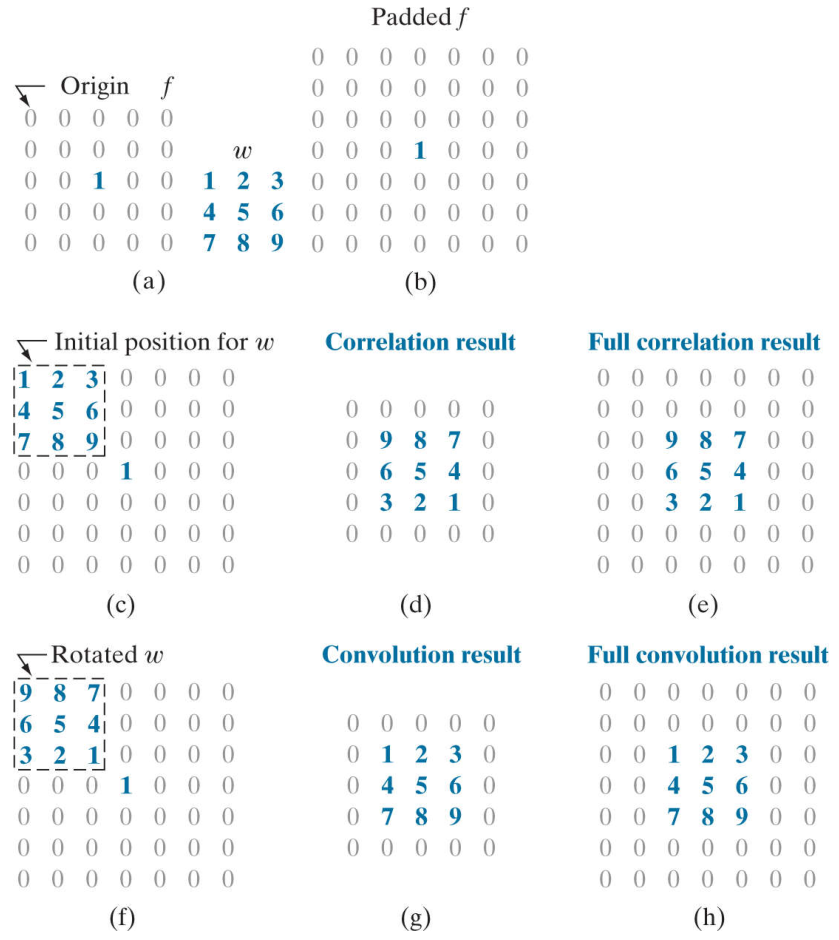


In [6]:
f2d = np.array([[0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 1, 0, 0],
                [0, 0, 0, 0, 0],
                [0, 0, 0, 0, 0]])
print('單位脈衝 f2d =\n', f2d)

print()
w2d = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print('濾波器 w2d =\n', w2d)

單位脈衝 f2d =
 [[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

濾波器 w2d =
 [[1 2 3]
 [4 5 6]
 [7 8 9]]


In [7]:
# 執行二維的 correlation 操作
fwcorr2d = correlate(f2d, w2d, mode='constant', cval=0)
print('f2d ⋆ w2d =\n', fwcorr2d)

f2d ⋆ w2d =
 [[0 0 0 0 0]
 [0 9 8 7 0]
 [0 6 5 4 0]
 [0 3 2 1 0]
 [0 0 0 0 0]]


In [8]:
# 執行二維的 convolution 操作
fwconv2d = convolve(f2d, w2d, mode='constant', cval=0)
print('f2d ∗ w2d =\n', fwconv2d)

f2d ∗ w2d =
 [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


可以預期將濾波器遮罩旋轉 180° 後，執行 correlation 的結果，應該會與 convolution 一模一樣。

In [9]:
# 將濾波器遮罩旋轉 180°
w2d_rot180 = np.rot90(w2d, 2)
# 用旋轉後的遮罩做 correlation
fwcorr2d_rot180 = correlate(f2d, w2d_rot180, mode='constant', cval=0)
print('f2d ⋆ w2d_rot180 =\n', fwcorr2d_rot180)

f2d ⋆ w2d_rot180 =
 [[0 0 0 0 0]
 [0 1 2 3 0]
 [0 4 5 6 0]
 [0 7 8 9 0]
 [0 0 0 0 0]]


<a id="dip-filter-intro"></a>

## 20.2 基本影像處理概念

*TODO*

<a id="cnn-intro"></a>

## 20.3 CNN 簡介

最早開始使用 convolution layer 的類神經網路 Neocognitron (1980)，發展到 1989 年 [Yann LeCun](https://en.wikipedia.org/wiki/Yann_LeCun) 開始採用 backpropagation 讓 convolution 濾波器遮罩的係數可以自動學習，奠立了現代電腦視覺的基礎手法。1998 年 LeCun 與 [Yoshua Bengio](https://en.wikipedia.org/wiki/Yoshua_Bengio) 團隊發表了開創性架構的 LeNet-5，這個技術並實際被一些銀行用來辨識支票上的手寫數字。當時的 LeNet-5 已經具備可以處理更高解析度以及建立更深層網路的雛型了，只是受限於當時電腦系統的運算資源。

一直到 GPU 的出現後，2004年開始有研究發現使用 GPU 來運算可以大幅加快 CNN 網路的學習，並且利用這個優勢贏了幾個影像辨識的競賽。但使得深度網路（深度學習）開始被廣泛注意的還是 [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton) 的學生 Alex Krizhevsky 在 2012 年贏得 ImageNet 競賽的 AlexNet 架構，這個架構也是利用 GPU 的優勢設計了深層的 CNN 網路，在當時以相當大幅度的進展（錯誤率 $25\% \to 16\%$ ）贏得了眾人的注意，開始引起了全世界新一波的人工智慧熱潮。


### CNN 基本架構

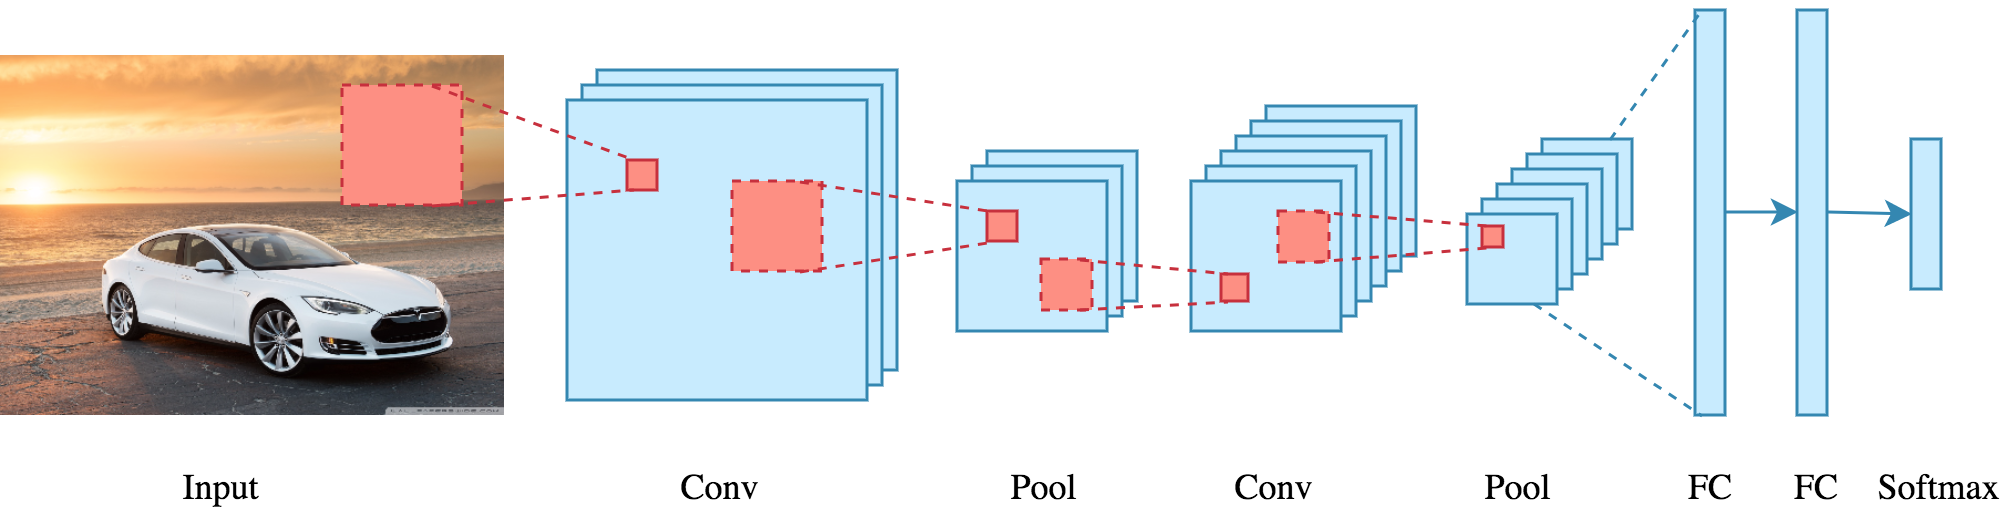

### Convolution Layer

符號表示:
- $n_{h}, n_{w}$: 輸入影像尺寸的長寬大小。
- $n_{c}$: 輸入影像的 channel 數，之後的層為濾波器遮罩數量。
- $f$: filter，濾波器遮罩大小，通常是長寬相等的正方形。
- $s$: stride，濾波操作時，尋訪像素的移動間隔。
- $p$: padding，邊緣填充大小。若 p = 2，則 $n_{h} = n_{h} + 2$, $n_{w} = n_{w} +2$。

一般而言，前一層的輸出是後面一層的輸入，第 $\ell$ 層的輸入大小以上標表示表示為 $n_{h}^{\ell - 1} \times n_{w}^{\ell - 1} \times n_{c}^{\ell - 1}$ （如：$6 \times 6 \times 3$），濾波器大小為 $f^{\ell} \times f^{\ell} \times n_{c}^{\ell - 1}$ （如：$3 \times 3 \times 3$）使用 $n_{c}^{\ell}$個濾波器（如：1個），濾波器移動間隔 $s^{\ell}$ （如：$1$），邊緣填充大小 $p^{\ell}$ （如：$0$），則第 $\ell$ 層 convolution 輸出大小表示為 $n_{h}^{\ell} \times n_{w}^{\ell} \times n_{c}^{\ell}$ （如：$4 \times 4 \times 1$）。 一般輸出的大小可用以下通式計算。

$$ n_{h}^{\ell} = \lfloor \frac{n_{h}^{\ell - 1} + 2p^{\ell} - f^{\ell}}{s^{\ell}} \rfloor + 1$$
$$ n_{w}^{\ell} = \lfloor \frac{n_{w}^{\ell - 1} + 2p^{\ell} - f^{\ell}}{s^{\ell}} \rfloor + 1$$

CNN 通常不使用 padding，但若輸出要取得於原始輸入大小一致，則需設定邊緣填補大小為 $p = \frac{1}{2} (f - 1)$。

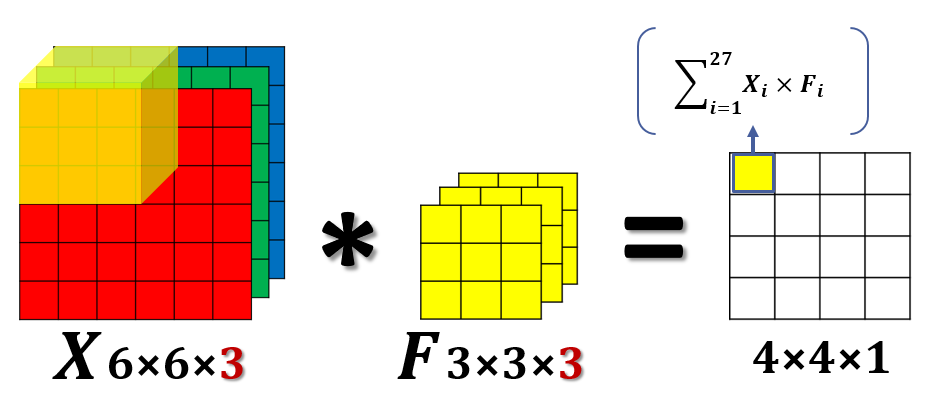

Convolution 層要學的參數就是濾波器的係數，雖然 CNN 的 convolution 通常沒有先把濾波器作旋轉，其實是數學上的 cross-correlation 操作，但是其實並不影響其效果及作用，因為最終濾波器係數都是訓練學習來的，所以可以不用旋轉濾波器遮罩來簡化運算。

經過 convolution 處理後的輸出，會先經過 activation function 再進入下一層，在 CNN 網路通常會使用 ReLU。

### Pooling Layer

在捲積層之後，CNN 網路結構常會接一層 pooling （**匯總；資源共享**）層來降低維度（註: 拜託，別再把 pooling 翻成池化了，這是很爛的沒腦翻譯）。 這是在 LeNet-5 架構就已經有開始採用的 downsampling 的類似手法，降低維度有助於特徵擷取及避免過度擬合。 由於 pooling 層單純只是用來降低取樣，所以完全沒有需要學習的參數。 常見的 downsampling 種類有 max pooling 及 average pooling，作法分別就是從 pool 遮罩（如：$2 \times 2$）範圍中取出最大值及平均值。

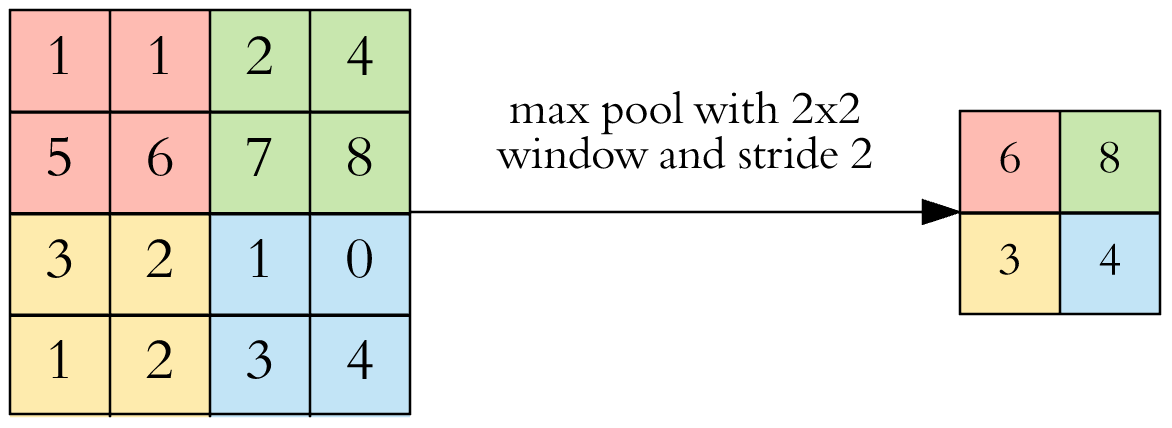


### Fully Connected Layer

由於 convolution 及 pooling 層的輸出都還是三維的資料陣列，在最後通常會把它攤平（flatten），使得隱藏層變成跟 DNN 一樣的一個維度的全部連接層，所以接下來的處理方式就可以跟 DNN 用一樣的方式了。

<a id="lenet5-mnist"></a>

## 20.4 CNN 範例 - 建構 LeNet5 用於手寫數字辨識

### LeNet-5 原文架構

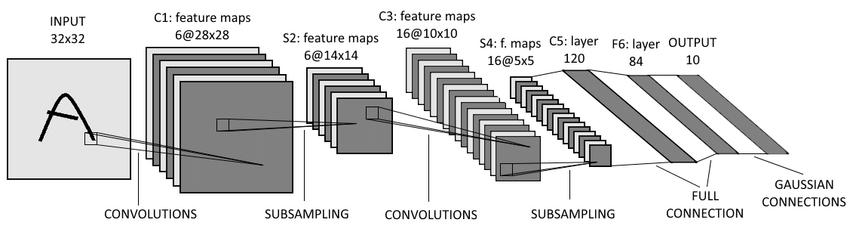

In [10]:
import tensorflow as tf

# 利用 keras 內建的函式庫載入 mnist 資料集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 檢視維度、大小、以及資料型態
print('x_train: shape={}, dtype={}'.format(x_train.shape, x_train.dtype))
print('x_test: shape={}, dtype={}'.format(x_test.shape, x_test.dtype))

x_train: shape=(60000, 28, 28), dtype=uint8
x_test: shape=(10000, 28, 28), dtype=uint8


### LeNet-5 現代版架構

由於 MNIST 手寫數字資料集的影像大小已經與原始論文不同，輸入會由 $32 \times 32$ 變成 $28 \times 28$，所以為了保持第一層 **CONV1** 的輸出大小不變，輸入的邊緣填充大小改為 $p=2$，其餘的 filter 及 pool 大小維持原設計。 捲積層後的激活函數比照原文使用的 $tanh$，只有最後的目標函數改用 $softmax$。

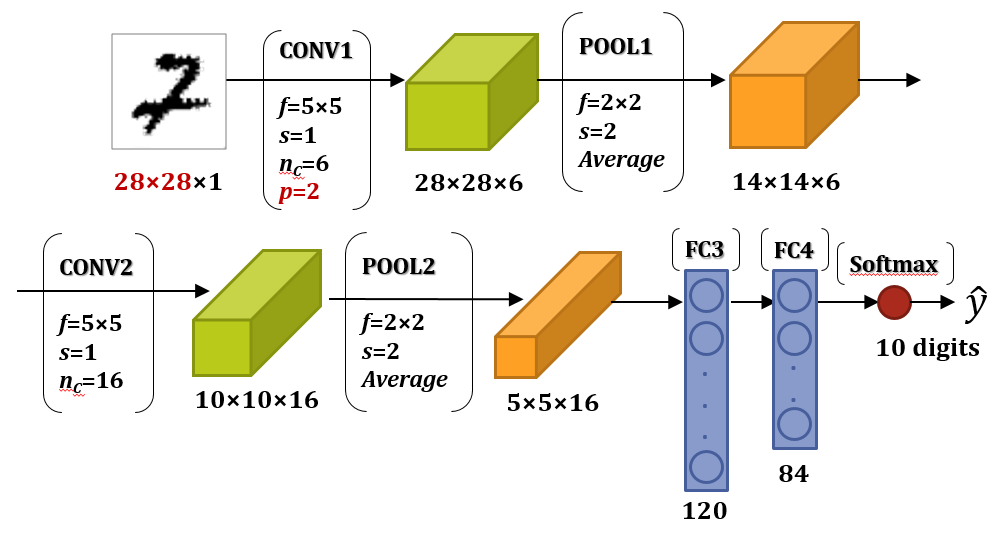

注意輸入影像的維度安排，Keras 預設是 (batch, height, width, channels) 的順序，稱為 **channel last**，這個輸入的格式可以在 `keras.layers.Conv2D` 裡用 `data_format` 參數修改。範例的 MNIST 手寫數字影像是 $28 \times 28$ 的大小，1 個 channel的灰階影像。

In [11]:
# 調整影像尺度在 [0,1] 範圍
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 輸入影像 reshape 到固定接受的 4D array 格式
x_train = x_train.reshape(*x_train.shape, 1)
x_test = x_test.reshape(*x_test.shape, 1)

# 檢視 reshape 及尺度調整後的維度大小及資料型態
print('x_train: shape={}, dtype={}'.format(x_train.shape, x_train.dtype))
print('x_test: shape={}, dtype={}'.format(x_test.shape, x_test.dtype))

x_train: shape=(60000, 28, 28, 1), dtype=float32
x_test: shape=(10000, 28, 28, 1), dtype=float32


In [12]:
# 將類別標籤轉為 one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 檢視 one-hot 編碼後的維度大小及資料型態
print('y_train: shape={}, dtype={}'.format(y_train.shape, y_train.dtype))
print('y_test: shape={}, dtype={}'.format(y_test.shape, y_test.dtype))

y_train: shape=(60000, 10), dtype=float32
y_test: shape=(10000, 10), dtype=float32


### 建立 LeNet-5 模型

`padding` 參數在 `tf.keras.layers.Conv2D()` 裡的設定只有 `"valid"` 和 `"same"` 兩種；*valid* 就是沒有填充；*same* 則是根據指定的 `kernel_size` 參數來計算輸出保持與輸入一樣的填充大小，即 $p= 0.5 \times (f - 1)$。

In [15]:
Input = tf.keras.layers.Input
Conv2D = tf.keras.layers.Conv2D
AveragePooling2D = tf.keras.layers.AveragePooling2D
Flatten = tf.keras.layers.Flatten
Dense = tf.keras.layers.Dense
Model = tf.keras.models.Model

def Create_LeNet5(input_size=(28,28,1)):
    # 輸入層
    X_input = Input(shape=input_size)

    # 第一層 CONV1
    X = Conv2D(filters=6,
               kernel_size=(5,5),
               strides=(1,1),
               padding='same',
               activation='tanh',
               name='conv1')(X_input)
    # 第一層 POOL1
    X = AveragePooling2D(pool_size=(2,2),
                         strides=(2,2))(X)

    # 第二層 CONV2
    X = Conv2D(filters=16,
               kernel_size=(5,5),
               strides=(1,1),
               padding='valid',
               activation='tanh',
               name='conv2')(X)
    # 第二層 POOL2
    X = AveragePooling2D(pool_size=(2,2),
                         strides=(2,2))(X)
    
    # 攤平後接到全連接層
    X = Flatten()(X)
    # 第三層 FC3
    X = Dense(units=120, activation='tanh',name='fc3')(X)
    # 第四層 FC4
    X = Dense(units=84, activation='tanh',name='fc4')(X)
    # 第五層輸出層
    Y_hat = Dense(units=10, activation='softmax')(X)
    
    model = Model(inputs=X_input, outputs=Y_hat, name='LeNet5')
    model.compile(optimizer='nadam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [16]:
LeNet5 = Create_LeNet5()
LeNet5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 120)               48120     
__________

### 訓練 LeNet-5 模型

In [17]:
history = LeNet5.fit(x=x_train,
                     y=y_train,
                     epochs=10,
                     batch_size=128,
                     validation_data=(x_test, y_test),
                     shuffle=True,
                     verbose=1)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 18s 294us/sample - loss: 0.2719 - acc: 0.9190 - val_loss: 0.1231 - val_acc: 0.9609
Epoch 2/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0966 - acc: 0.9705 - val_loss: 0.0766 - val_acc: 0.9754
Epoch 3/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0655 - acc: 0.9797 - val_loss: 0.0644 - val_acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.0481 - acc: 0.9853 - val_loss: 0.0563 - val_acc: 0.9832
Epoch 5/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0382 - acc: 0.9878 - val_loss: 0.0539 - val_acc: 0.9853
Epoch 6/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.0303 - acc: 0.9899 - val_loss: 0.0628 - val_acc: 0.9813
Epoch 7/10
60000/60000 [==============================] 

<a id="dogs-cats"></a>

## 20.5 CNN 範例 - 貓狗辨識

貓狗辨識資料集取自 [Kaggle 競賽](https://www.kaggle.com/c/dogs-vs-cats)，訓練集包含 25,000 張貓狗影像，測試集包含 12,500 張貓狗影像。


In [ ]:
# 顯示幾張資料集中的貓狗影像
# TODO

資料集的影像大小不一致，有很多套件可以用來處理影像（如：scipy、scikit-image、PIL），Keras 也有內建一些常用的工具方便訓練模型之前的前處理。

+ [`tf.keras.preprocessing.image.load_img`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img)
+ [`tf.keras.preprocessing.image.save_img`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/save_img)
+ [`tf.keras.preprocessing.image.img_to_array`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/img_to_array)
+ [`tf.keras.preprocessing.image.array_to_img`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/array_to_img)

例如，可以用 `load_img()` 手動載入影像，且指定載入後的目標影像大小，然後用 `img_to_array()` 轉成 numpy 陣列，一張一張接起來成為高維陣列或是清單。

或是，也可以用 keras 提供的 `ImageDataGenerator` 類別的方法 `flow_from_directory()`：
+ [`tf.keras.preprocessing.image.ImageDataGenerator`](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

`flow_from_directory()` 方法傾向於假設資料集目錄分成 "train" 及 "test" 兩個資料夾，每個資料夾下又各自有類別的子目錄，如以下樹狀圖。
```
dogs_vs_cats
├── test
│   ├── cats
│   └── dogs
└── train
    ├── cats
    └── dogs
```
假設 train.zip 解壓縮在 "dogs_vs_cats" 目錄下，所以 "train" 資料夾裡有所有訓練集的影像，其他該有的目錄也已經手動建立如上的樹狀圖，以下程式碼可以用來將影像檔案（隨機）安排到所希望的位置。

In [2]:
from random import seed
from random import random
from pathlib import Path
from shutil import copyfile

# seed random number generator
seed(1)
# 切割驗證集的比例
val_ratio = 0.25

data_root = Path('./dataset/dogs_vs_cats/train/')
test_dir = Path('./dataset/dogs_vs_cats/test/')
train_dir = Path('./dataset/dogs_vs_cats/train/')

# 複製檔案到分配的目錄
for source in data_root.glob('*.jpg'):
    # TODO: 用更適合的隨機 train-test 分割法
    target = test_dir if random() < val_ratio else train_dir
    if source.match('cat*.jpg'):     
        copyfile(source, target.joinpath('cats/' + source.name))
    elif source.match('dog*.jpg'):
        copyfile(source, target.joinpath('dogs/' + source.name))

<a id="references"></a>

## References:
+ Rafael C. Gonzalez, Richard E. Woods, *"Digital Image Processing"*, Pearson, 2018.
+ Arden Dertat, *"Applied Deep Learning - Part 4: Convolutional Neural Networks"*, Towards Data Science, 2017. [[link]](https://towardsdatascience.com/applied-deep-learning-part-4-convolutional-neural-networks-584bc134c1e2)
+ Yann LeCun, Léon Bottou, Yoshua Bengio, Patrick Haffner, *"Gradient-based learning applied to document recognition"*. Proceedings of the IEEE. [[doi:10.1109/5.726791]](https://doi.org/10.1109%2F5.726791)
+ Jason Brownlee, *"How to Classify Photos of Dogs and Cats (with 97% accuracy)"*, Machine Learning Mastery, 2019. [[link]](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/)